In [59]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import  BaseEstimator, TransformerMixin
from sklearn.svm import SVC
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
warnings.filterwarnings('ignore')

In [12]:
#Install the requirements
! pip install --upgrade pip
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.4 kB/s eta 0:00:0000:0100:06
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)


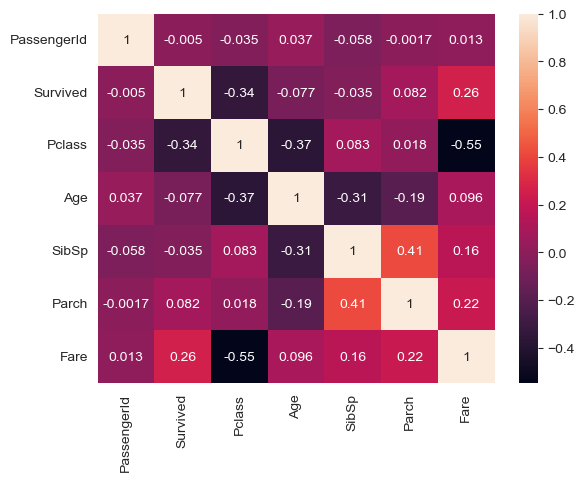

In [20]:
#Read the titanic dataset
titanic_df = pd.read_csv('./data/titanic/train.csv')
display(titanic_df.head())
#Check the shape of the dataset
print(titanic_df.shape)
# Check the correlation between the features
corr = titanic_df.corr(numeric_only=True)
sns.heatmap(corr, annot = True)
plt.show()



In [21]:
# Check the missing values in the dataset
print(titanic_df.isnull().sum())
# Convert sex to numeric
titanic_df["Sex"] = titanic_df["Sex"] .apply(lambda x: 1 if x == "male" else 0)
display(titanic_df.head())
display(titanic_df.describe())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [180]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

#Make the function for preprocessing the dataset
# Do feature Encoding for the categorical variables

# Make imputer
class Imputer(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self._feature_names = feature_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        imputer = SimpleImputer(strategy='mean')
        X[self._feature_names] = imputer.fit_transform(X[self._feature_names])
        return X


class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_columns_and_new_column_name):
        for i in range(len(categorical_columns_and_new_column_name)):
            if len(categorical_columns_and_new_column_name[i]) != 2:
                raise ValueError("The length of the tuple should be 2")
            if not isinstance(categorical_columns_and_new_column_name[i][1], list):
                raise ValueError("The second element of the tuple should be a list")
        self.categorical_columns_and_new_column_name = categorical_columns_and_new_column_name
        self.categorical_columns = [x[0] for x in categorical_columns_and_new_column_name]
        self.new_column_names = [x[1] for x in categorical_columns_and_new_column_name]

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        encoder = OneHotEncoder()
        for category, column_names in zip(self.categorical_columns, self.new_column_names):
            if category not in X.columns:
                raise ValueError(f"{category} is not present in the dataset")
            
            # Reshape the input column to 2D array
            reshaped_column = X[category].values.reshape(-1, 1)
            
            transformed_data = encoder.fit_transform(reshaped_column).toarray()
            
            for i in range(len(transformed_data.T)):
                X[column_names[i]] = transformed_data.T[i]
            
        X.drop(self.categorical_columns, axis=1, inplace=True)
        # drop N column from the dataset if it is present
        if "N" in X.columns:
            X.drop(["N"], axis=1, inplace=True)
        display(X.head())
        return X

        

# Make the pipeline for the preprocessing
pipline = Pipeline([
    ("imputer",Imputer(["Age","Fare"])),
    ("featureincoder",FeatureEncoder([("Sex",["female","male"]),("Embarked",["S","C","Q","N"]) ])),
    ("scaler",StandardScaler())
    ])

def preprocess_data(df):
    df_copy = df.copy()
    columns_to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]
    df_copy.drop(columns_to_drop,axis=1,inplace=True)
    transformed_df = pipline.fit_transform(df_copy)
    display(transformed_df.shape)
    return df_copy


In [181]:
#Run the pipeline over the dataset
titanic_df_copy = titanic_df.copy()
preprocessed_data = preprocess_data(titanic_df_copy)
# display(preprocessed_data.head())

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,S,C,Q
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


(891, 11)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
('Pclass', 0.08427377700795365)
('Age', 0.25293966104650284)
('SibSp', 0.051134337661406196)
('Parch', 0.03655224506857226)
('Fare', 0.25223270914061147)
('female', 0.14129665814357237)
('male', 0.14936634200946144)
('S', 0.011824162961657713)
('C', 0.006691217371539823)
('Q', 0.013688889588722303)


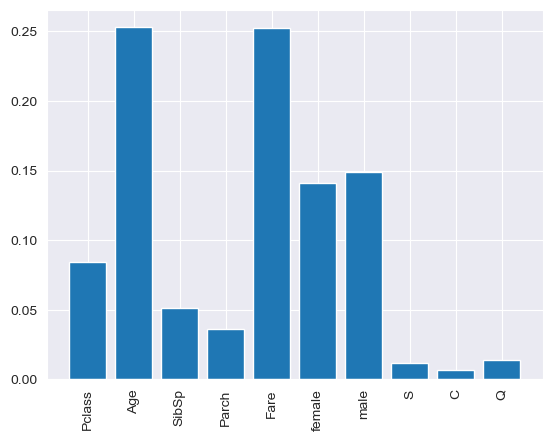

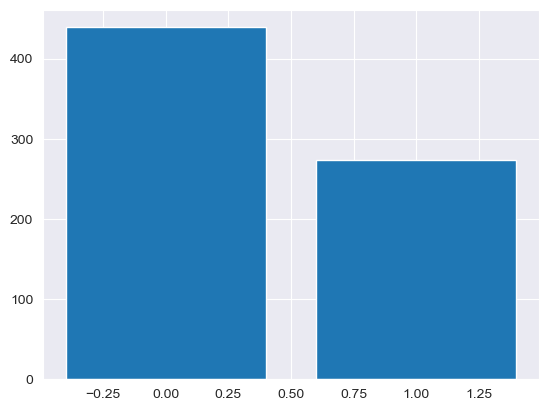

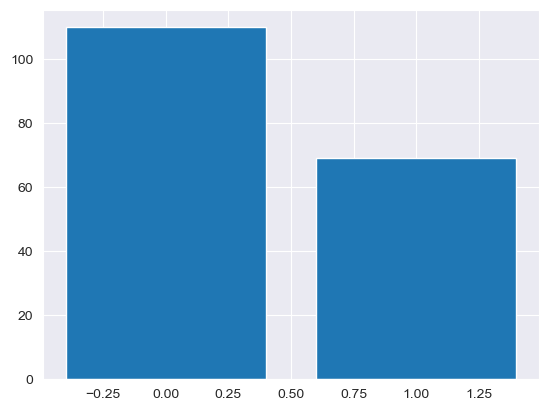

0    0.616573
1    0.383427
Name: Survived, dtype: float64
0    0.614525
1    0.385475
Name: Survived, dtype: float64


In [182]:
# Split the dataset into train and test using stratified shuffle split

print(titanic_df_copy.isnull().sum())
titanic_df_copy= preprocessed_data.copy()
X = titanic_df_copy.drop(['Survived'], axis=1)
y = titanic_df_copy['Survived']
# Get important features from the dataset using random forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X, y)
# Print the feature importance with their names
for feature in zip(X.columns, rf.feature_importances_):
    print(feature)
# Plot the feature importance
plt.bar(X.columns, rf.feature_importances_)
plt.xticks(rotation=90)
plt.show()


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#Create the pipeline


# Display the distribution of the target variable in train and test using bar plot
plt.bar(y_train.value_counts().index, y_train.value_counts())
plt.show()
plt.bar(y_test.value_counts().index, y_test.value_counts())
plt.show()
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))



In [183]:
def get_accuracy(y_pred_proba,y_test, y_pred, model_name):
    print(f"{model_name}:")
    print(accuracy_score(y_test, y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    print("ROC Curve")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    print("*"*50)

Logistic Regression:
0.7877094972067039
Confusion Matrix
[[97 13]
 [25 44]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       110
           1       0.77      0.64      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179

ROC Curve


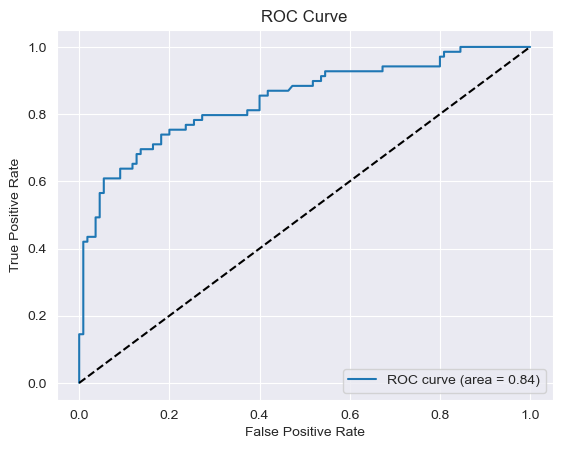

**************************************************
Random Forest:
0.7821229050279329
Confusion Matrix
[[95 15]
 [24 45]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       110
           1       0.75      0.65      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

ROC Curve


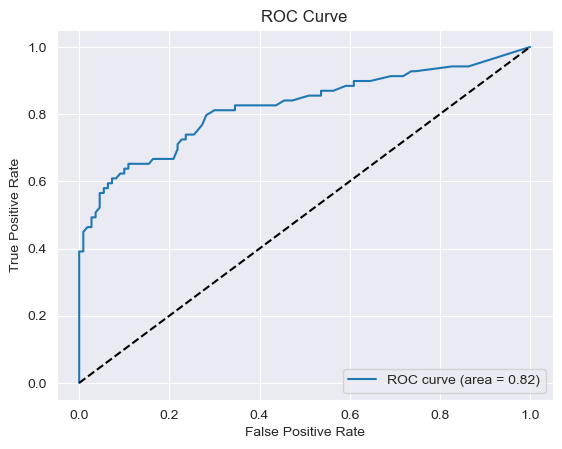

**************************************************
Gradient Boosting:
0.8547486033519553
Confusion Matrix
[[104   6]
 [ 20  49]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       110
           1       0.89      0.71      0.79        69

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179

ROC Curve


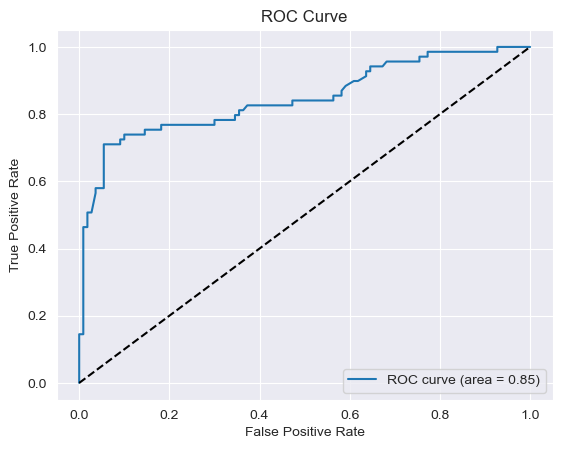

**************************************************
Support Vector Machine:
0.6312849162011173
Confusion Matrix
[[96 14]
 [52 17]]
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.87      0.74       110
           1       0.55      0.25      0.34        69

    accuracy                           0.63       179
   macro avg       0.60      0.56      0.54       179
weighted avg       0.61      0.63      0.59       179

ROC Curve


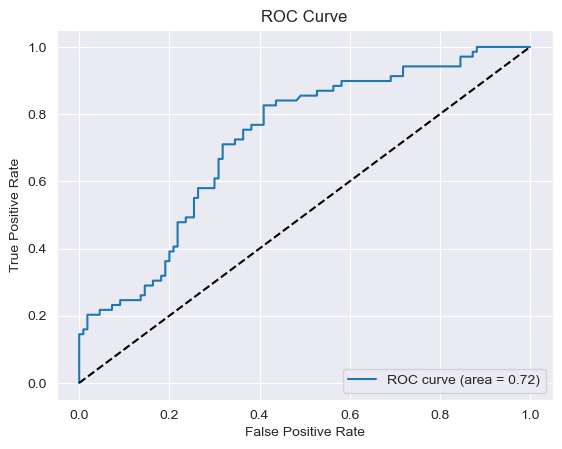

**************************************************


In [184]:
#Train different models and check the accuracy
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
# Do this in a function
get_accuracy(lr.predict_proba(X_test)[:,1],y_test, y_pred, "Logistic Regression")
    
#Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
get_accuracy(y_pred_proba,y_test, y_pred, "Random Forest")

#Gradient Boosting

gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
y_pred_proba = gb.predict_proba(X_test)[:,1]
get_accuracy(y_pred_proba,y_test, y_pred, "Gradient Boosting")

# Support Vector Machine
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_pred_proba = svc.predict_proba(X_test)[:,1]
get_accuracy(y_pred_proba,y_test, y_pred, "Support Vector Machine")



In [185]:
#Read test dataset
test_df = pd.read_csv('./data/titanic/test.csv')
display(test_df.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [186]:
#Preprocess the test dataset
test_df_copy = test_df.copy()
test_df_copy = preprocess_data(test_df_copy)
display(X_train.head())
#Make the prediction using the best model i.e. Gradient Boosting
y_pred = gb.predict(test_df_copy)
#make the submission file
submission = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':y_pred})
display(submission.head())
submission.to_csv('./data/titanic/submission.csv',index=False)


,Pclass,Age,SibSp,Parch,Fare,female,male,S,C,Q
0,3,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,1.0


(418, 10)

,Pclass,Age,SibSp,Parch,Fare,female,male,S,C,Q
502,3,29.699118,0,0,7.6292,1.0,0.0,0.0,1.0,0.0
464,3,29.699118,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
198,3,29.699118,0,0,7.7500,1.0,0.0,0.0,1.0,0.0
765,1,51.000000,1,0,77.9583,1.0,0.0,0.0,0.0,1.0
421,3,21.000000,0,0,7.7333,0.0,1.0,0.0,1.0,0.0


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [167]:
#Hyperparameter tuning for random forest
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'max_features': [3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5, 6]
}
rf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)


Fitting 3 folds for each of 4500 candidates, totalling 13500 fits
[CV] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.8s
[CV] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.8s
[CV] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   1.5s
[CV] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.7s
[CV] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   1.4s
[CV] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] E

In [166]:
#Hyperparameter tuning for gradient boosting
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'max_features': [3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5, 6]
}
gb = GradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(estimator = gb, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 3 folds for each of 4500 candidates, totalling 13500 fits
[CV] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   1.0s
[CV] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   1.1s
[CV] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   0.8s
[CV] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] E